In [1]:
#from youtube_comment_scraper_python import *

In [2]:
#!pip install youtube-comment-scraper-python

In [3]:
#!pip install --upgrade pip

# Data Extraction

In [ ]:
# from youtube_comment_scraper_python import *
# import pandas as pd

# link = input("Youtube links: ")
# saved = input("Output name: ")
# youtube.open(link)

# response = youtube.video_comments()
# all_data = []
# for i in range(0, 20): # It will scroll 10 times
#     response = youtube.video_comments()
#     data = response['body']
#     all_data.extend(data)
# df = pd.DataFrame(data)
# df.to_csv(saved)

In [ ]:
# Movie name - Black adam trailer

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#from youtube_comment_scraper_python import *

In [5]:
data = pd.read_csv('E:\\Python\\Project\\Youtube Sentiment\\comments.csv')
data.head

<bound method NDFrame.head of      Unnamed: 0                                            Comment Likes  \
0             0  Love how Dr. Fate's design looks and how cool ...   12K   
1             1  I can’t get over how good everything looks. Dr...  2.6K   
2             2  Really hoping that this can save DC's movie un...   814   
3             3  U cant deny how good this looks.Now if they ca...    91   
4             4  From this trailer, I have a feeling that this ...   367   
..          ...                                                ...   ...   
275         275  I want to see this. It may be one of his most ...     0   
276         276       wow thats very amazing. I can't wait to see.     0   
277         277                    Doctor Fate is why i'm watching     5   
278         278  This looks fire. DC looks like they stepping t...     0   
279         279  Shazam : "I don't want fight you Black Adam."B...     0   

                    Time  user UserLink  
0             9

In [6]:
# Checkinf the columns
data.columns

Index(['Unnamed: 0', 'Comment', 'Likes', 'Time', 'user', 'UserLink'], dtype='object')

In [7]:
#Drop the unwanted columns
data.drop(['Unnamed: 0','Likes','Time','user','UserLink'],axis=1,inplace=True)

In [8]:
data.head()

,Comment
0,Love how Dr. Fate's design looks and how cool ...
1,I can’t get over how good everything looks. Dr...
2,Really hoping that this can save DC's movie un...
3,U cant deny how good this looks.Now if they ca...
4,"From this trailer, I have a feeling that this ..."


In [9]:
data.shape

(280, 1)

In [10]:
# Creating new feature by calculating polarity score
from nltk.sentiment.vader import SentimentIntensityAnalyzer   #This library is use to calculate polarity score

In [11]:
import nltk
#nltk.download('vader_lexicon')

In [12]:
#VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is 
#specifically attuned to sentiments expressed in social media, and works well on texts from other domains.

In [13]:
sentiments = SentimentIntensityAnalyzer()

data['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in data['Comment']]

In [14]:
[sentiments.polarity_scores(i) for i in data['Comment']]

[{'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'compound': 0.891},
 {'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'compound': 0.6801},
 {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.9216},
 {'neg': 0.049, 'neu': 0.649, 'pos': 0.302, 'compound': 0.9262},
 {'neg': 0.0, 'neu': 0.869, 'pos': 0.131, 'compound': 0.4416},
 {'neg': 0.0, 'neu': 0.503, 'pos': 0.497, 'compound': 0.9501},
 {'neg': 0.247, 'neu': 0.753, 'pos': 0.0, 'compound': -0.6002},
 {'neg': 0.058, 'neu': 0.82, 'pos': 0.122, 'compound': 0.3071},
 {'neg': 0.0, 'neu': 0.961, 'pos': 0.039, 'compound': 0.2714},
 {'neg': 0.039, 'neu': 0.714, 'pos': 0.247, 'compound': 0.902},
 {'neg': 0.193, 'neu': 0.712, 'pos': 0.095, 'compound': -0.886},
 {'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'compound': 0.973},
 {'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'compound': 0.7103},
 {'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'compound': 0.7319},
 {'neg': 0.064, 'neu': 0.773, 'pos': 0.163, 'compound': 0.6573},
 {'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'compo

In [15]:
data.head()

,Comment,Positive
0,Love how Dr. Fate's design looks and how cool ...,0.384
1,I can’t get over how good everything looks. Dr...,0.153
2,Really hoping that this can save DC's movie un...,0.375
3,U cant deny how good this looks.Now if they ca...,0.302
4,"From this trailer, I have a feeling that this ...",0.131


In [16]:
data['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in data['Comment']]
data['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in data['Comment']]
data['Compound'] = [sentiments.polarity_scores(i)['compound'] for i in data['Comment']]

In [17]:
data.head()

,Comment,Positive,Negative,Neutral,Compound
0,Love how Dr. Fate's design looks and how cool ...,0.384,0.000,0.616,0.8910
1,I can’t get over how good everything looks. Dr...,0.153,0.000,0.847,0.6801
2,Really hoping that this can save DC's movie un...,0.375,0.000,0.625,0.9216
3,U cant deny how good this looks.Now if they ca...,0.302,0.049,0.649,0.9262
4,"From this trailer, I have a feeling that this ...",0.131,0.000,0.869,0.4416


In [18]:
# Dividing the comments into positive,negative and neutral
score = data['Compound'].values

In [19]:
score

array([ 0.891 ,  0.6801,  0.9216,  0.9262,  0.4416,  0.9501, -0.6002,
        0.3071,  0.2714,  0.902 , -0.886 ,  0.973 ,  0.7103,  0.7319,
        0.6573,  0.624 ,  0.6028, -0.2782,  0.8999,  0.    , -0.5154,
        0.8713, -0.1531,  0.5374,  0.9133,  0.5229, -0.2584,  0.9039,
        0.9638,  0.6808,  0.7481,  0.5911,  0.8834,  0.3182,  0.4404,
        0.7579,  0.8949,  0.8116, -0.5574,  0.9567,  0.631 ,  0.34  ,
        0.6892,  0.7495,  0.8925,  0.4215,  0.    ,  0.3369,  0.7621,
        0.7579, -0.6124, -0.7579,  0.9466,  0.    ,  0.3612,  0.8029,
        0.7265,  0.9219, -0.8225,  0.    ,  0.    ,  0.8599,  0.    ,
        0.7579,  0.5423,  0.5267,  0.836 ,  0.4404,  0.    ,  0.8356,
        0.659 ,  0.6588,  0.5574, -0.1548,  0.6249,  0.    , -0.4449,
        0.    ,  0.9153,  0.923 ,  0.9017,  0.9538,  0.5272,  0.6249,
        0.8402, -0.4588, -0.1779,  0.9637,  0.5848,  0.658 , -0.4545,
        0.7845,  0.4005,  0.    ,  0.7798,  0.5859,  0.3182, -0.6892,
        0.7469, -0.3

In [20]:
data['Compound'].values.shape

(280,)

In [21]:
sentiment = []
for i in score:
    if i >= 0.05:
        sentiment.append('Positive')
    elif i <=-0.05:
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')

In [22]:
data['Sentiment'] = pd.Series(sentiment)

In [23]:
data.head()

,Comment,Positive,Negative,Neutral,Compound,Sentiment
0,Love how Dr. Fate's design looks and how cool ...,0.384,0.000,0.616,0.8910,Positive
1,I can’t get over how good everything looks. Dr...,0.153,0.000,0.847,0.6801,Positive
2,Really hoping that this can save DC's movie un...,0.375,0.000,0.625,0.9216,Positive
3,U cant deny how good this looks.Now if they ca...,0.302,0.049,0.649,0.9262,Positive
4,"From this trailer, I have a feeling that this ...",0.131,0.000,0.869,0.4416,Positive


In [24]:
data[data['Sentiment']== 'Negative'].head()

,Comment,Positive,Negative,Neutral,Compound,Sentiment
6,I have never been more hyped for a comic book ...,0.000,0.247,0.753,-0.6002,Negative
10,Anguish and Rage are the two of most dangerous...,0.095,0.193,0.712,-0.8860,Negative
17,So looks like it’s going to be Black Adam Vs t...,0.125,0.175,0.700,-0.2782,Negative
20,Can't wait to see more villain redemption. I w...,0.090,0.223,0.687,-0.5154,Negative
22,Finally something that is pure badass and no j...,0.129,0.224,0.647,-0.1531,Negative


In [25]:
# Final Data
df = data.drop(['Positive','Negative','Neutral','Compound'],axis=1)
df.head()

,Comment,Sentiment
0,Love how Dr. Fate's design looks and how cool ...,Positive
1,I can’t get over how good everything looks. Dr...,Positive
2,Really hoping that this can save DC's movie un...,Positive
3,U cant deny how good this looks.Now if they ca...,Positive
4,"From this trailer, I have a feeling that this ...",Positive


In [26]:
df.Comment

0      Love how Dr. Fate's design looks and how cool ...
1      I can’t get over how good everything looks. Dr...
2      Really hoping that this can save DC's movie un...
3      U cant deny how good this looks.Now if they ca...
4      From this trailer, I have a feeling that this ...
                             ...                        
275    I want to see this. It may be one of his most ...
276         wow thats very amazing. I can't wait to see.
277                      Doctor Fate is why i'm watching
278    This looks fire. DC looks like they stepping t...
279    Shazam : "I don't want fight you Black Adam."B...
Name: Comment, Length: 280, dtype: object

# Data transformation

In [27]:
#1.Lowercasing
df['Comment'] = df['Comment'].str.lower()

In [28]:
df.head()

,Comment,Sentiment
0,love how dr. fate's design looks and how cool ...,Positive
1,i can’t get over how good everything looks. dr...,Positive
2,really hoping that this can save dc's movie un...,Positive
3,u cant deny how good this looks.now if they ca...,Positive
4,"from this trailer, i have a feeling that this ...",Positive


In [29]:
#2. Remove Punctuation marks
import string
def remove_punc(text):
    nonp_text = "".join([char for char in text if char not in string.punctuation])
    return nonp_text

df['Comment'] = df['Comment'].apply(lambda x: remove_punc(x))

In [30]:
df.head()

,Comment,Sentiment
0,love how dr fates design looks and how cool hi...,Positive
1,i can’t get over how good everything looks dr ...,Positive
2,really hoping that this can save dcs movie uni...,Positive
3,u cant deny how good this looksnow if they can...,Positive
4,from this trailer i have a feeling that this m...,Positive


In [31]:
#3. Tokanization
def tokanize(text):
    tokens = text.split(" ")
    return tokens

In [32]:
df['Comment'] = df['Comment'].apply(lambda x: tokanize(x))

In [33]:
df.head()

,Comment,Sentiment
0,"[love, how, dr, fates, design, looks, and, how...",Positive
1,"[i, can’t, get, over, how, good, everything, l...",Positive
2,"[really, hoping, that, this, can, save, dcs, m...",Positive
3,"[u, cant, deny, how, good, this, looksnow, if,...",Positive
4,"[from, this, trailer, i, have, a, feeling, tha...",Positive


In [34]:
# 4.Remove stopwords
import nltk
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(token):
    text = [word for word in token if word not in stopwords]
    return text
df['Comment'] = df['Comment'].apply(lambda x: remove_stopwords(x))

In [35]:
df.head()

,Comment,Sentiment
0,"[love, dr, fates, design, looks, cool, scenes,...",Positive
1,"[can’t, get, good, everything, looks, dr, fate...",Positive
2,"[really, hoping, save, dcs, movie, universe, l...",Positive
3,"[u, cant, deny, good, looksnow, follow, , rest...",Positive
4,"[trailer, feeling, movie, going, one, movies, ...",Positive


In [36]:
# 4.Stemming
ps = nltk.PorterStemmer()

def stem_word(text_s):
    text = [ps.stem(word) for word in text_s]
    return text
df['Comment'] = df['Comment'].apply(lambda x: stem_word(x))

In [37]:
df.head()

,Comment,Sentiment
0,"[love, dr, fate, design, look, cool, scene, lo...",Positive
1,"[can’t, get, good, everyth, look, dr, fate’, m...",Positive
2,"[realli, hope, save, dc, movi, univers, look, ...",Positive
3,"[u, cant, deni, good, looksnow, follow, , rest...",Positive
4,"[trailer, feel, movi, go, one, movi, would, ne...",Positive


In [38]:
# 5.Lammatization
lemma = nltk.WordNetLemmatizer()
def lem(text_l):
    text = [lemma.lemmatize(word) for word in text_l]
    return text
df['Comment'] = df['Comment'].apply(lambda x: lem(x))

In [39]:
df.head()

,Comment,Sentiment
0,"[love, dr, fate, design, look, cool, scene, lo...",Positive
1,"[can’t, get, good, everyth, look, dr, fate’, m...",Positive
2,"[realli, hope, save, dc, movi, univers, look, ...",Positive
3,"[u, cant, deni, good, looksnow, follow, , rest...",Positive
4,"[trailer, feel, movi, go, one, movi, would, ne...",Positive


In [40]:
df['Comment'] = df['Comment'].fillna('').apply(str)   #for replace nan values or any other special character which is not string

In [41]:
# 6. Preprocessing using regular expressions
import re
def text_processing(text):
    
    # remove new line characters in text
    text = re.sub(r'\n',' ', text)
    
     # remove references and hashtags from text
    text = re.sub("^a-zA-Z0-9$,.", "", text)
    
    # remove multiple spaces from text
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    
    # remove special characters from text
    text = re.sub(r'\W', ' ', text)
    
    return text



In [42]:
df['Comment'] = df['Comment'].apply(lambda x: text_processing(x))

In [43]:
df.head()

,Comment,Sentiment
0,love dr fate design look cool...,Positive
1,can t get good everyth look d...,Positive
2,realli hope save dc movi univ...,Positive
3,u cant deni good looksnow fol...,Positive
4,trailer feel movi go one movi...,Positive


In [44]:
# Apply label encoding to encode sentiment column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [45]:
final_df = df.copy()

In [46]:
final_df.sample(8)

,Comment,Sentiment
223,im still tri wrap head around...,Negative
171,look refresh cant wait experi ...,Positive
122,final good dc movi,Positive
150,doubt one greatest movi ever,Positive
253,cant wait,Neutral
136,faith movi go good want battl...,Negative
68,atom smasher land give goosebump,Neutral
148,1 realli hope black adam figh...,Negative


In [47]:
final_df['Sentiment'] = le.fit_transform(final_df['Sentiment'])

In [48]:
final_df.sample(8)

,Comment,Sentiment
46,cant wait look incred,1
138,first dc movi truli excit wat...,2
17,look like it go black adam ...,0
186,everyon still root rock although...,1
43,absolut insan back 2020 total ...,2
57,love justic societi gonna fun,2
236,way better first trailer im m...,2
12,look amaz marvel instal year ...,2


In [49]:
le.classes_

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [50]:
# Check if the data is balanced or not.
final_df['Sentiment'].value_counts()

2    205
1     39
0     36
Name: Sentiment, dtype: int64

C:\Users\intel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

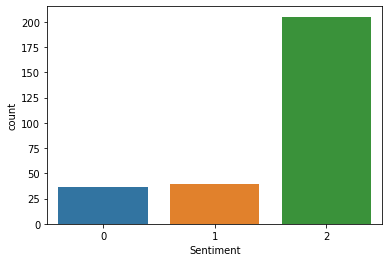

In [51]:
sns.countplot(final_df['Sentiment'])

**#The data is imbalanced so we need to balance the data**

In [52]:
le.classes_

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [53]:
#Here Negative = 0, Neutral = 1, Positive = 2
# We balance the data or equal the values of negative and neutral equal to positive values

In [54]:
final_df[(final_df['Sentiment']==0)].head()

,Comment,Sentiment
6,never hype comic book movi ev...,0
10,anguish rage two danger emot ...,0
17,look like it go black adam ...,0
20,cant wait see villain redempt ...,0
22,final someth pure badass joke ...,0


In [55]:
## Using above technique
#df_negative = final_df[(final_df['Sentiment']==0)]
#df_neutral = final_df[(final_df['Sentiment']==1)]
#df_positive = final_df[(final_df['Sentiment']==2)]

In [56]:
#Now upsample the minority classes using resample function
#from sklearn.utils import resample
#df_negative_upsampled = resample(df_negative,replace=True,n_samples=205,random_state=42)
#
#df_neutral_upsampled = resample(df_neutral,replace=True,n_samples=205,random_state=42)
#
## Concatenate the upsampled dataframes with the Positive df dataframe
#test_data = pd.concat([df_negative_upsampled,df_neutral_upsampled,df_positive])


In [57]:
#from sklearn.utils import resample
#help(resample())

In [58]:
final_df.head()

,Comment,Sentiment
0,love dr fate design look cool...,2
1,can t get good everyth look d...,2
2,realli hope save dc movi univ...,2
3,u cant deni good looksnow fol...,2
4,trailer feel movi go one movi...,2


In [59]:
final_df.shape

(280, 2)

In [68]:
#Now first convert the text column into numeric using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1500)
x = tfidf.fit_transform(final_df['Comment'])

In [69]:
#Assign sentiment column to y
y = final_df['Sentiment']

In [70]:
#Now apply SMOTE for upsampling our dataset
from imblearn.over_sampling import SMOTE
su = SMOTE(random_state=42)
x_su, y_su = su.fit_resample(x, y)

In [71]:
y_su.value_counts()

2    205
0    205
1    205
Name: Sentiment, dtype: int64

In [72]:
x_su.shape

(615, 941)

In [73]:
y_su.shape

(615,)

<AxesSubplot:ylabel='Type'>

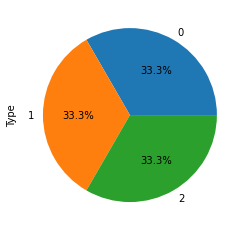

In [74]:
y_su.groupby(y_su).size().plot(kind='pie',
                                       y = y_su,
                                       label = "Type",
                                       autopct='%1.1f%%')

In [75]:
y_su.head()

0    2
1    2
2    2
3    2
4    2
Name: Sentiment, dtype: int32

In [82]:
X = x_su.toarray()

* **Model Building**

In [83]:
from sklearn .model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, y_su,test_size=0.25, random_state=42)

In [84]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X, y_su)

GaussianNB()

In [85]:
y_pred = gb.predict(x_test)
y_pred

array([2, 0, 0, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 0, 2, 0, 1, 2, 1, 1, 0, 2,
       1, 0, 1, 0, 1, 0, 2, 1, 0, 2, 0, 0, 0, 2, 1, 1, 2, 2, 1, 0, 0, 0,
       2, 1, 2, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 1, 1, 1, 1, 2, 0, 1, 0, 1,
       2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1, 1, 1, 1, 2, 0,
       0, 1, 2, 0, 1, 2, 1, 2, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 2, 0, 2, 2,
       1, 2, 0, 1, 2, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0,
       0, 1, 2, 2, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 0, 0, 1, 2, 1, 2])

In [86]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [92]:
print('Tranning score:',accuracy_score(y_test,y_pred))

Tranning score: 0.974025974025974


In [94]:
print('Testing score:',accuracy_score(y_train, gb.predict(x_train)))

Testing score: 0.9739696312364425


In [99]:
confusion_matrix(y_test,y_pred)

array([[45,  0,  0],
       [ 0, 50,  0],
       [ 3,  1, 55]], dtype=int64)

In [98]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        45
           1       0.98      1.00      0.99        50
           2       1.00      0.93      0.96        59

    accuracy                           0.97       154
   macro avg       0.97      0.98      0.97       154
weighted avg       0.98      0.97      0.97       154



In [106]:
gb.predict(x_train[[25]])

array([2])

In [107]:
X[2]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.34761919, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [108]:
final_df['Comment'][2]

'  realli    hope    save    dc    movi    univers    look    nice    far    cast    seem    great    tone    feel    appropri    cant    wait    watch  '